In [1]:
import os
os.chdir("/y/home/zyw/tmp/DeepPurpose/")

In [ ]:
from DeepPurpose import utils,dataset,DTI

In [2]:
X_drug, X_target, y = dataset.load_process_KIBA('./data/', binary=False)

Beginning Processing...
Beginning to extract zip file...
Done!
in total: 118254 drug-target pairs
encoding drug...
unique drugs: 2068
drug encoding finished...
encoding protein...
unique target sequence: 229
protein encoding finished...
splitting dataset...
Done.


in total: 118254 drug-target pairs
encoding drug...
unique drugs: 2068
drug encoding finished...
encoding protein...
unique target sequence: 229
protein encoding finished...
splitting dataset...
Done.
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 138.682. Total time 0.00055 hours
Training at Epoch 1 iteration 100 with loss 0.75021. Total time 0.01333 hours
Training at Epoch 1 iteration 200 with loss 0.66862. Total time 0.02583 hours
Training at Epoch 1 iteration 300 with loss 1.04627. Total time 0.03833 hours
Validation at Epoch 1 , MSE: 0.47419 , Pearson Correlation: 0.58892 with p-value: 0.0 , Concordance Index: 0.71187
Training at Epoch 2 iteration 0 with loss 0.67185. Total time 0.0475 hours
Training at Epoch 2 iteration 100 with loss 0.51149. Total time 0.06055 hours
Training at Epoch 2 iteration 200 with loss 0.53381. Total time 0.07305 hours
Training at Epoch 2 iteration 300 with loss 0.57203. Total time 0.08527 hours

Validation at Epoch 19 , MSE: 0.31367 , Pearson Correlation: 0.76489 with p-value: 0.0 , Concordance Index: 0.80541
Training at Epoch 20 iteration 0 with loss 0.40342. Total time 0.86972 hours
Training at Epoch 20 iteration 100 with loss 0.32952. Total time 0.88222 hours
Training at Epoch 20 iteration 200 with loss 0.40096. Total time 0.89416 hours
Training at Epoch 20 iteration 300 with loss 0.47073. Total time 0.90638 hours
Validation at Epoch 20 , MSE: 0.32313 , Pearson Correlation: 0.76409 with p-value: 0.0 , Concordance Index: 0.80576
Training at Epoch 21 iteration 0 with loss 0.41739. Total time 0.91527 hours
Training at Epoch 21 iteration 100 with loss 0.27796. Total time 0.9275 hours
Training at Epoch 21 iteration 200 with loss 0.35977. Total time 0.93972 hours
Training at Epoch 21 iteration 300 with loss 0.39317. Total time 0.95194 hours
Validation at Epoch 21 , MSE: 0.30707 , Pearson Correlation: 0.76463 with p-value: 0.0 , Concordance Index: 0.80878
--- Go for Testing ---
Up

Training at Epoch 38 iteration 300 with loss 0.20623. Total time 1.73472 hours
Validation at Epoch 38 , MSE: 0.23843 , Pearson Correlation: 0.82379 with p-value: 0.0 , Concordance Index: 0.83962
Training at Epoch 39 iteration 0 with loss 0.21800. Total time 1.74361 hours
Training at Epoch 39 iteration 100 with loss 0.25011. Total time 1.75611 hours
Training at Epoch 39 iteration 200 with loss 0.22881. Total time 1.76805 hours
Training at Epoch 39 iteration 300 with loss 0.17528. Total time 1.78 hours
Validation at Epoch 39 , MSE: 0.22537 , Pearson Correlation: 0.82834 with p-value: 0.0 , Concordance Index: 0.84563
Training at Epoch 40 iteration 0 with loss 0.19840. Total time 1.78888 hours
Training at Epoch 40 iteration 100 with loss 0.25397. Total time 1.80138 hours
Training at Epoch 40 iteration 200 with loss 0.19293. Total time 1.81333 hours
Training at Epoch 40 iteration 300 with loss 0.23820. Total time 1.82527 hours
Validation at Epoch 40 , MSE: 0.23967 , Pearson Correlation: 0.8

Training at Epoch 57 iteration 200 with loss 0.18572. Total time 2.59444 hours
Training at Epoch 57 iteration 300 with loss 0.19864. Total time 2.60666 hours
Validation at Epoch 57 , MSE: 0.21074 , Pearson Correlation: 0.84994 with p-value: 0.0 , Concordance Index: 0.85343
Training at Epoch 58 iteration 0 with loss 0.18760. Total time 2.61527 hours
Training at Epoch 58 iteration 100 with loss 0.15053. Total time 2.62777 hours
Training at Epoch 58 iteration 200 with loss 0.15787. Total time 2.63972 hours
Training at Epoch 58 iteration 300 with loss 0.17802. Total time 2.65166 hours
Validation at Epoch 58 , MSE: 0.20190 , Pearson Correlation: 0.84858 with p-value: 0.0 , Concordance Index: 0.85884
Training at Epoch 59 iteration 0 with loss 0.20131. Total time 2.66055 hours
Training at Epoch 59 iteration 100 with loss 0.17627. Total time 2.67277 hours
Training at Epoch 59 iteration 200 with loss 0.19749. Total time 2.68472 hours
Training at Epoch 59 iteration 300 with loss 0.13964. Total t

Training at Epoch 76 iteration 100 with loss 0.10225. Total time 3.45111 hours
Training at Epoch 76 iteration 200 with loss 0.09912. Total time 3.46333 hours
Training at Epoch 76 iteration 300 with loss 0.16480. Total time 3.47555 hours
Validation at Epoch 76 , MSE: 0.18546 , Pearson Correlation: 0.86198 with p-value: 0.0 , Concordance Index: 0.86693
Training at Epoch 77 iteration 0 with loss 0.13203. Total time 3.48416 hours
Training at Epoch 77 iteration 100 with loss 0.15191. Total time 3.49666 hours
Training at Epoch 77 iteration 200 with loss 0.13957. Total time 3.50888 hours
Training at Epoch 77 iteration 300 with loss 0.16041. Total time 3.52111 hours
Validation at Epoch 77 , MSE: 0.19292 , Pearson Correlation: 0.85684 with p-value: 0.0 , Concordance Index: 0.86661
Training at Epoch 78 iteration 0 with loss 0.13327. Total time 3.53 hours
Training at Epoch 78 iteration 100 with loss 0.15437. Total time 3.5425 hours
Training at Epoch 78 iteration 200 with loss 0.11250. Total time 

Training at Epoch 95 iteration 0 with loss 0.10615. Total time 4.31111 hours
Training at Epoch 95 iteration 100 with loss 0.15305. Total time 4.32361 hours
Training at Epoch 95 iteration 200 with loss 0.09253. Total time 4.33555 hours
Training at Epoch 95 iteration 300 with loss 0.12682. Total time 4.34777 hours
Validation at Epoch 95 , MSE: 0.19651 , Pearson Correlation: 0.85869 with p-value: 0.0 , Concordance Index: 0.86961
Training at Epoch 96 iteration 0 with loss 0.09775. Total time 4.35638 hours
Training at Epoch 96 iteration 100 with loss 0.10054. Total time 4.36888 hours
Training at Epoch 96 iteration 200 with loss 0.11991. Total time 4.38083 hours
Training at Epoch 96 iteration 300 with loss 0.11556. Total time 4.39277 hours
Validation at Epoch 96 , MSE: 0.19567 , Pearson Correlation: 0.86067 with p-value: 0.0 , Concordance Index: 0.87295
Training at Epoch 97 iteration 0 with loss 0.14588. Total time 4.40166 hours
Training at Epoch 97 iteration 100 with loss 0.10178. Total tim

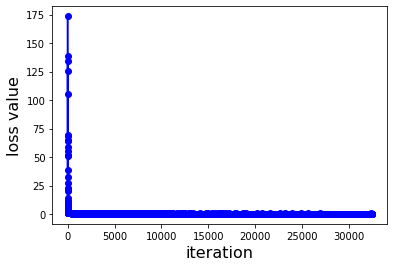

In [10]:
drug_encoding = 'Morgan'
target_encoding = 'AAC'

In [ ]:
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method = 'random', frac = [0.7,0.1,0.2], random_seed = 2)

In [ ]:
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12])

In [ ]:
model = models.model_initialize(**config)

In [ ]:
model.train(train, val, test)

In [ ]:
model.save_model('./save_model/model_Morgan_AAC_Kiba')